In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
def scatter_plots(x_col, y_cols, df):
    num_plots = len(y_cols)
    num_rows = (num_plots + 3) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, y_col in enumerate(y_cols):
        sns.scatterplot(x=x_col, y=y_col, data=df, ax=axes[i])
        axes[i].set_title(f'{x_col} vs {y_col}')
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
        axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def scatter_plot(x_col, y_col, df):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

def get_null_percentage(column_name, df):
    null_percentage = df[column_name].isnull().sum() / len(df) * 100
    display(f"Null percentage for {column_name}: {null_percentage:.2f}")

def hist_plots(df, cols):
    plt.figure(figsize=(20, 70))
    for i, col in enumerate(cols):
        plt.subplot(25, 5, i + 1)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col)
        plt.title(col)
        plt.grid(True)
        plt.tight_layout()
    plt.show()

def hist_plot(col, df):
    plt.figure(figsize=(8, 8))
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.title(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def box_plots(df, cols):
    plt.figure(figsize=(20, 70))
    for i, col in enumerate(cols):
        plt.subplot(25, 5, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.tight_layout()
    plt.show()

def box_plot(col, df):
    plt.figure(figsize=(8, 8))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
display(train_df.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [5]:
# As sii column is calculated from PCIAT Total and that is calculated from PCIAT questions, we can drop all PCIAT columns. We will only keep the season column
columns_to_drop = train_df.filter(regex='^PCIAT').columns.difference(['PCIAT-Season'])
train_df.drop(columns=columns_to_drop, inplace=True)

In [6]:
high_null_columns = train_df.columns[train_df.isnull().mean() > 0.5]
print("Columns with more than 50% null values:")
display(high_null_columns)

Columns with more than 50% null values:


Index(['Physical-Waist_Circumference', 'Fitness_Endurance-Season',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total',
       'PAQ_C-Season', 'PAQ_C-PAQ_C_Total'],
      dtype='object')

In [7]:
# Converting seasons to numeric values
def convert_season_to_numeric(season):
    season_mapping = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}
    return season_mapping.get(season, season)

train_df.update(train_df.filter(regex='Season$').applymap(convert_season_to_numeric))

/var/folders/md/j2f882mn1vl7cb0f7l2mmkjh0000gp/T/ipykernel_64743/1457187412.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_df.update(train_df.filter(regex='Season$').applymap(convert_season_to_numeric))


In [8]:
# Knowing that BMI is calculated from weight and height we can get rid of those two columns
train_df.drop(columns=['Physical-Weight', 'Physical-Height'], inplace=True)

In [9]:
get_null_percentage('BIA-BIA_BMI', train_df)
get_null_percentage('Physical-BMI', train_df)

'Null percentage for BIA-BIA_BMI: 49.72'

'Null percentage for Physical-BMI: 23.69'

In [10]:
# We will see what are the average difference between BIA-BIA_BMI and Physical-BMI and possibly use one of them to fill the missing values in the other column
valid_rows = train_df.dropna(subset=['BIA-BIA_BMI', 'Physical-BMI'])
difference = valid_rows['BIA-BIA_BMI'] - valid_rows['Physical-BMI']
average_difference = difference.mean()

print(f"Average difference: {average_difference}")

Average difference: 0.008277280229832533


In [11]:
train_df['Physical-BMI'] = train_df['Physical-BMI'].fillna(train_df['BIA-BIA_BMI'])

In [12]:
# To not create bias in data we will drop them
train_df.drop(columns=high_null_columns, inplace=True)

In [13]:
get_null_percentage('Physical-BMI', train_df)

'Null percentage for Physical-BMI: 23.18'

In [14]:
# That did not make a huge difference so we will drop one of the columns and will the value in a different way
train_df.drop(columns=['BIA-BIA_BMI'], inplace=True)

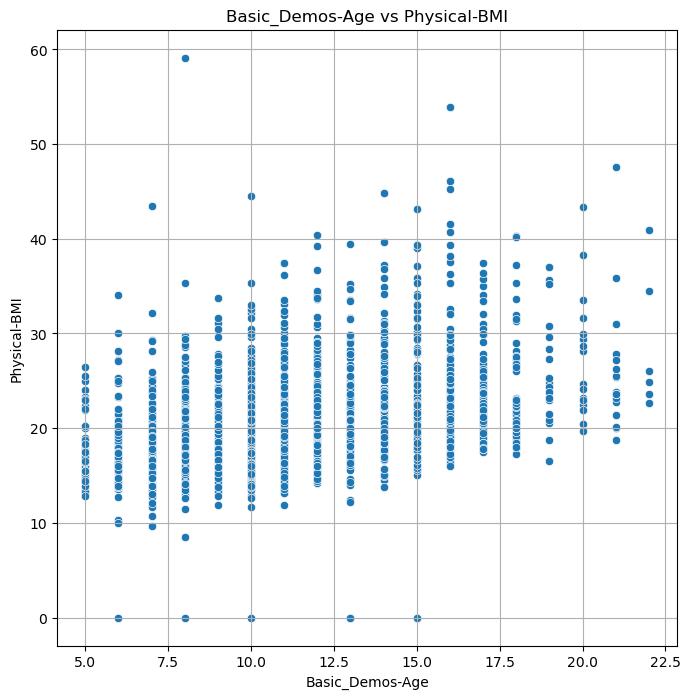

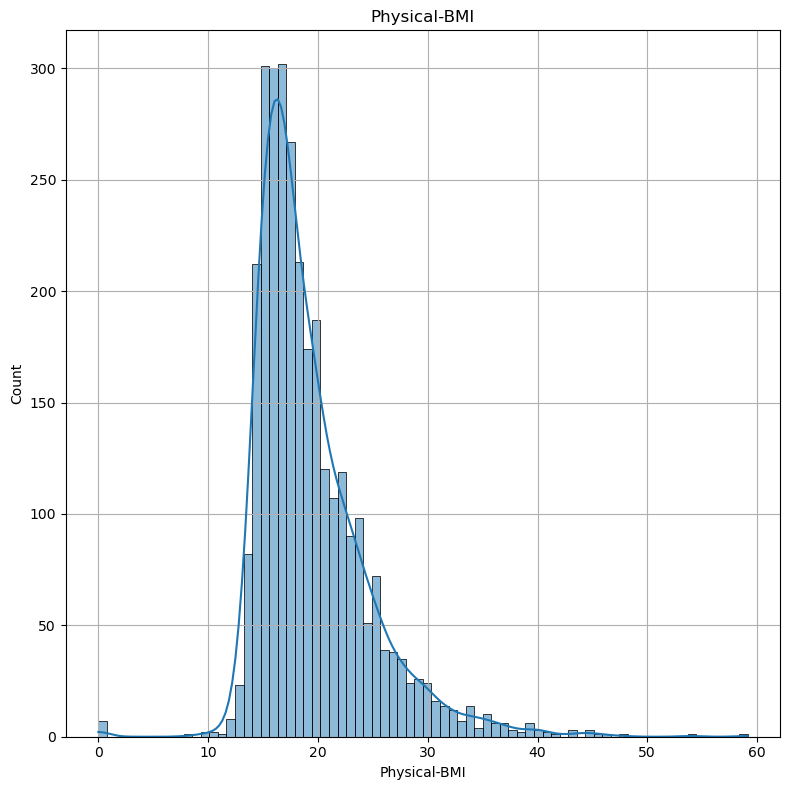

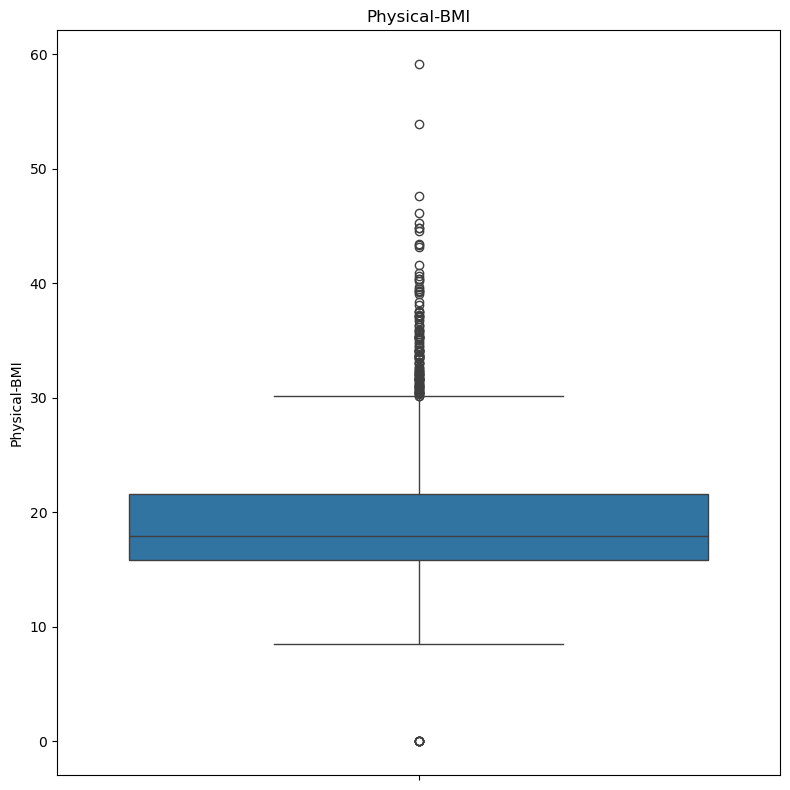

In [15]:
scatter_plot('Basic_Demos-Age', 'Physical-BMI', train_df)
hist_plot('Physical-BMI', train_df)
box_plot('Physical-BMI', train_df)


In [16]:
# Seeing as the data has a right skewed bell curve and the data is close together, we can use the median or average value to fill the missing values
Q1 = train_df['Physical-BMI'].quantile(0.25)
Q3 = train_df['Physical-BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_bmi = train_df[(train_df['Physical-BMI'] >= lower_bound) & (train_df['Physical-BMI'] <= upper_bound)]['Physical-BMI']

adjusted_bmi = np.log(filtered_bmi)

average_bmi = adjusted_bmi.mean()
median_bmi = adjusted_bmi.median()

print(f"Average BMI (log-transformed): {average_bmi}")
print(f"Median BMI (log-transformed): {median_bmi}")

Average BMI (log-transformed): 2.9105432836592926
Median BMI (log-transformed): 2.8753845074739646


In [17]:
# We ill be using the average value to fill the missing values by first apply log on the current columns and then filling the missing values
train_df['Physical-BMI'] = np.log(train_df['Physical-BMI'])
train_df['Physical-BMI'].fillna(average_bmi, inplace=True)

/Users/mhv/.pyenv/versions/anaconda3-2023.07-2/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/md/j2f882mn1vl7cb0f7l2mmkjh0000gp/T/ipykernel_64743/959253734.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Physical-BMI'].fillna(average_bmi, inplace=True)


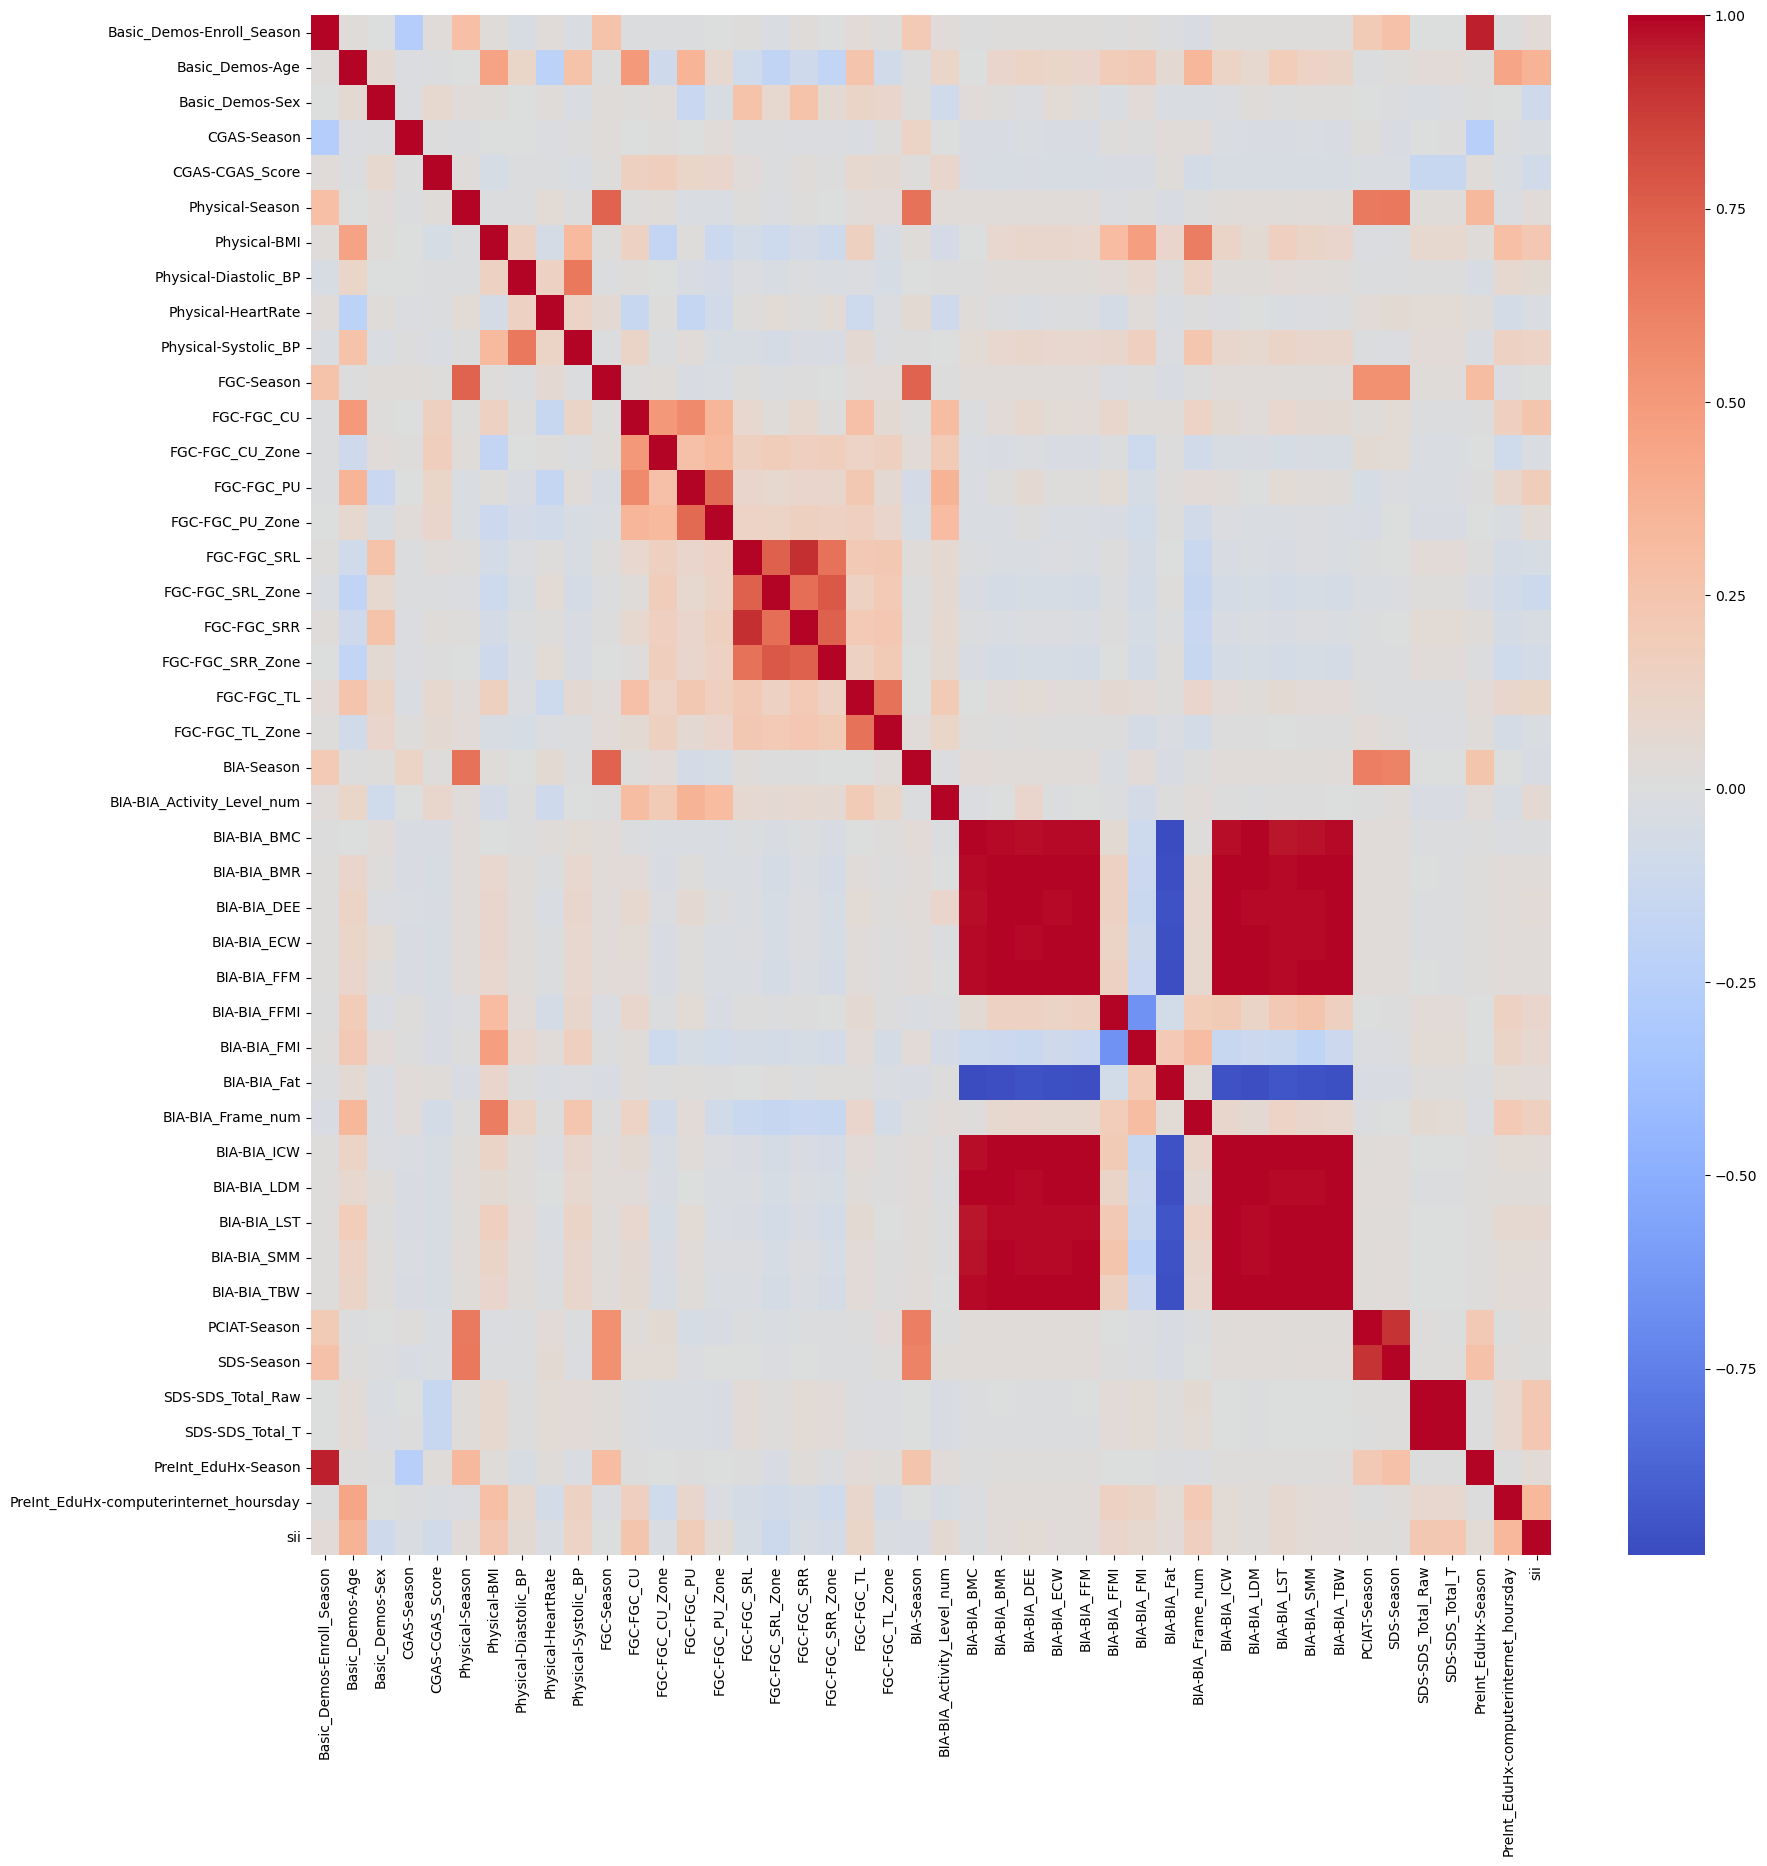

In [18]:
# Lets look at a correlation matrix to see if there are any columns that are highly correlated to see if we can get rid of them
temp = train_df.copy()
temp.drop(['id'], axis=1, inplace=True)
correlation_matrix = temp.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [19]:
# Seeing that many columns in BIA are highly correlated, we will look if we can drop them
bia_df = train_df.filter(regex='^BIA')
null_percentage = bia_df.isnull().sum() / len(bia_df) * 100
display(null_percentage)

BIA-Season                    45.833333
BIA-BIA_Activity_Level_num    49.722222
BIA-BIA_BMC                   49.722222
BIA-BIA_BMR                   49.722222
BIA-BIA_DEE                   49.722222
BIA-BIA_ECW                   49.722222
BIA-BIA_FFM                   49.722222
BIA-BIA_FFMI                  49.722222
BIA-BIA_FMI                   49.722222
BIA-BIA_Fat                   49.722222
BIA-BIA_Frame_num             49.722222
BIA-BIA_ICW                   49.722222
BIA-BIA_LDM                   49.722222
BIA-BIA_LST                   49.722222
BIA-BIA_SMM                   49.722222
BIA-BIA_TBW                   49.722222
dtype: float64

In [20]:
# As the null percentage is around 50%, we can drop the columns as we can assume the corelation is not from missing values
bia_corr_matrix = train_df.filter(regex='^BIA').corr()

high_corr_threshold = 0.9
high_corr_pairs = bia_corr_matrix.columns[
    (bia_corr_matrix.abs() > high_corr_threshold).sum() > 1
]

train_df.drop(columns=high_corr_pairs, inplace=True)

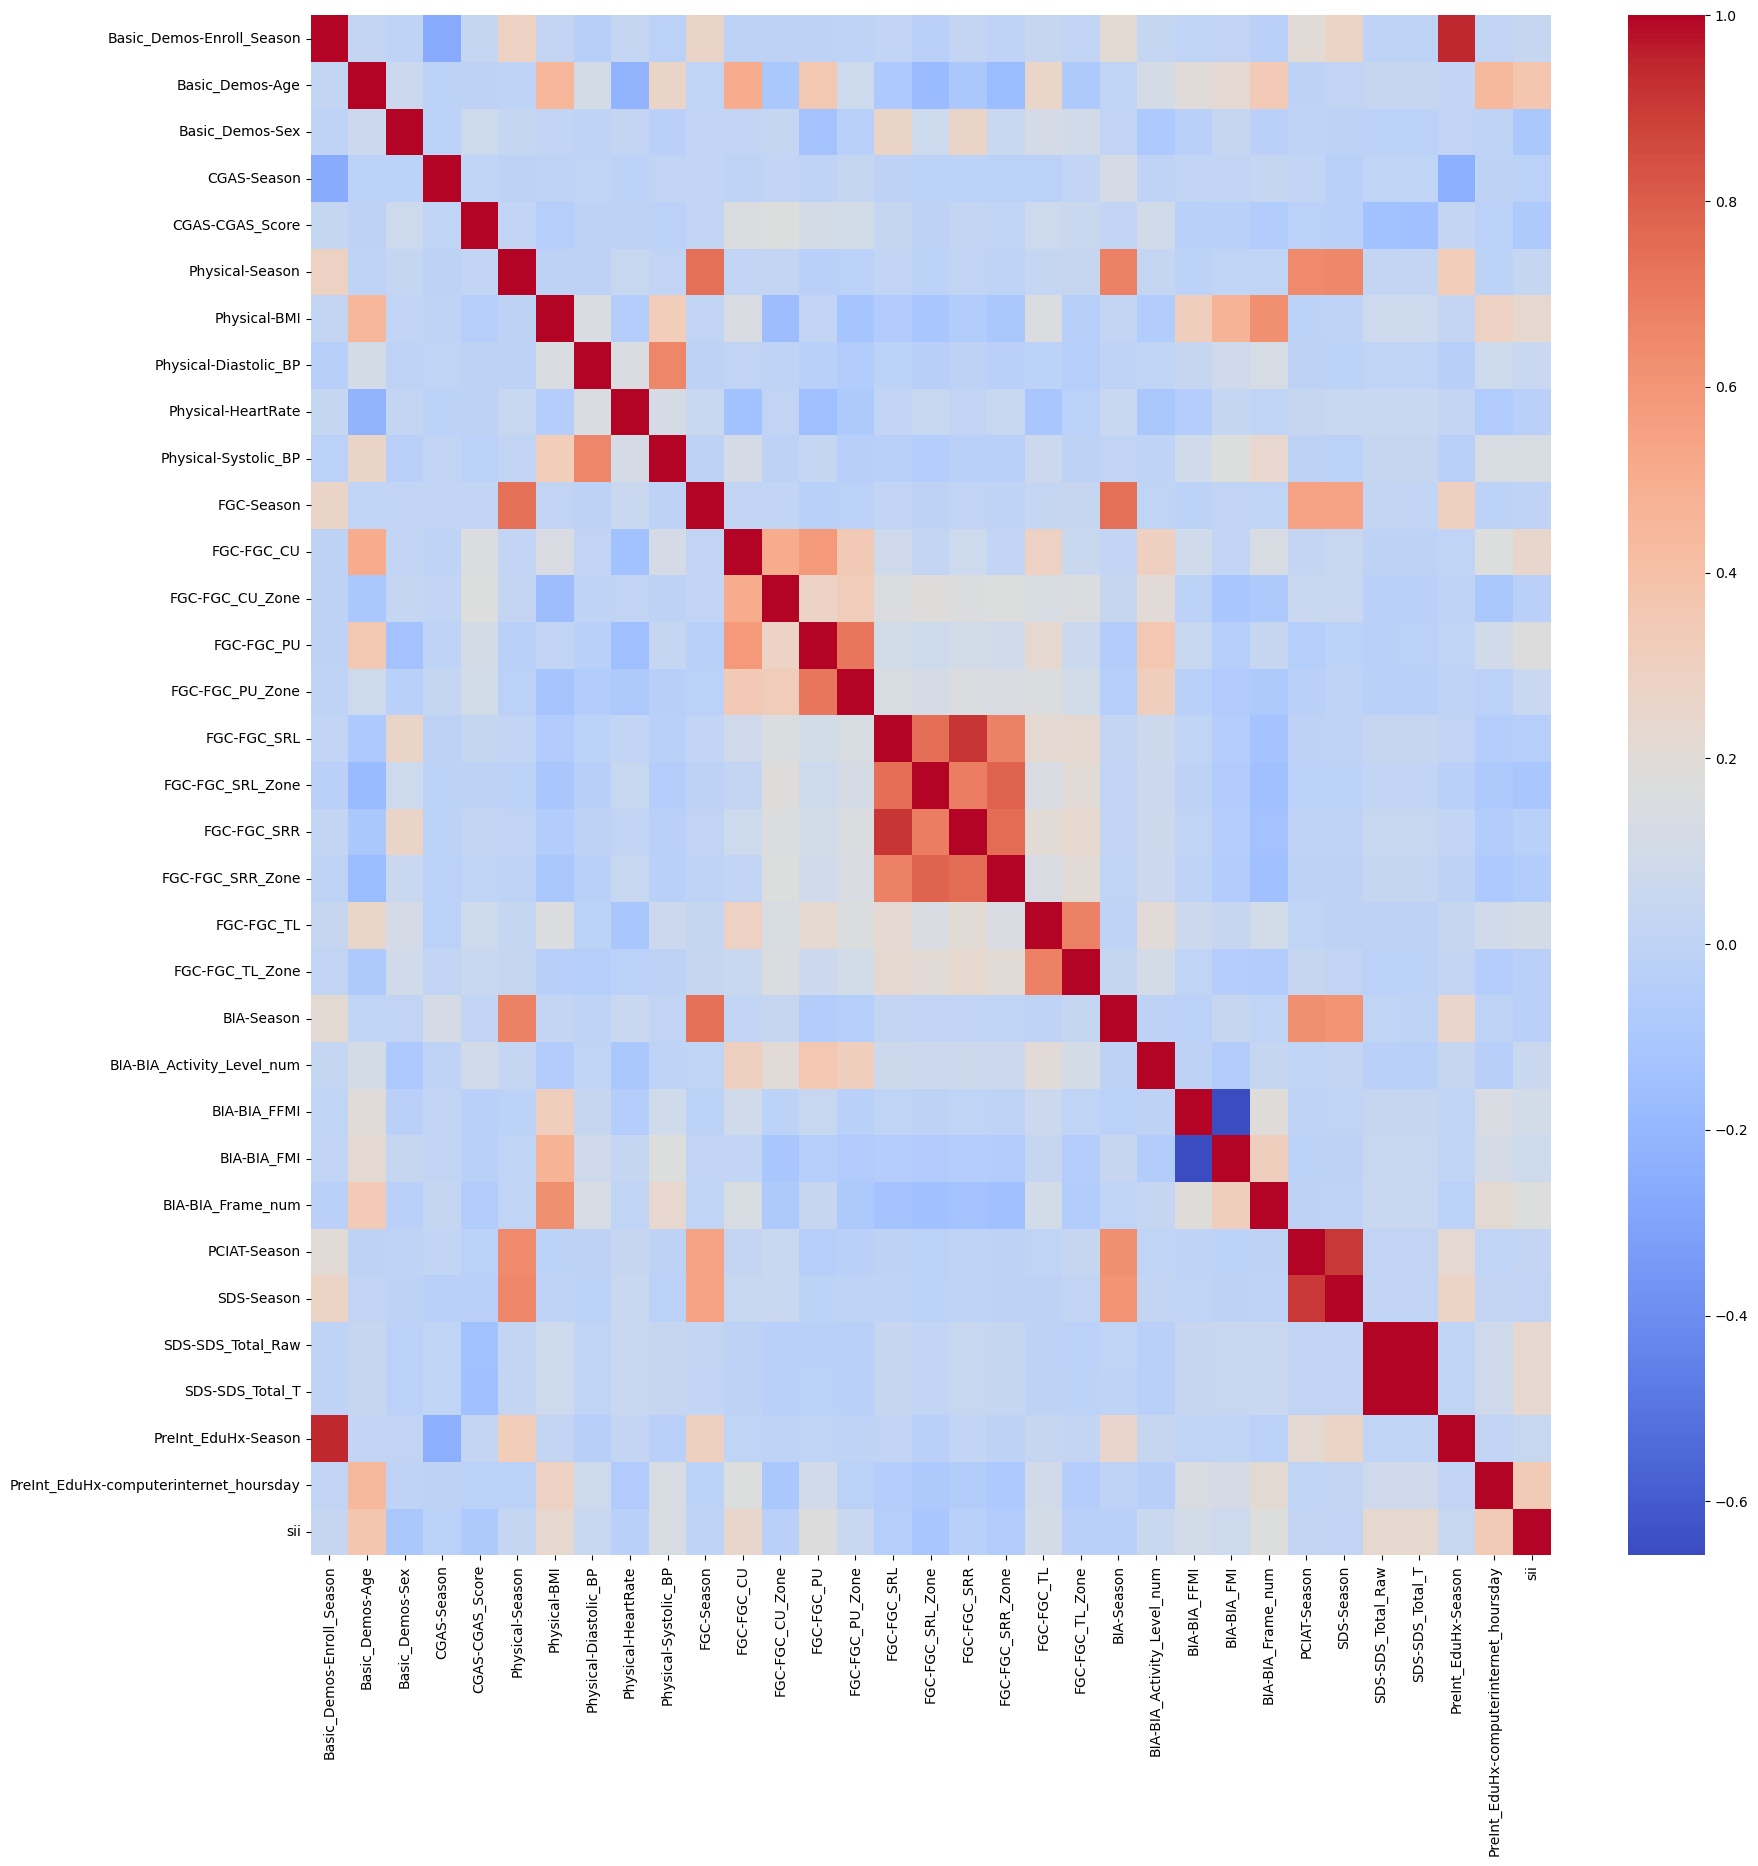

In [21]:
temp = train_df.copy()
temp.drop(['id'], axis=1, inplace=True)
correlation_matrix = temp.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [22]:
fgc_sr_columns = ['FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone']
temp.drop(columns=['SDS-SDS_Total_Raw'] + fgc_sr_columns, inplace=True)

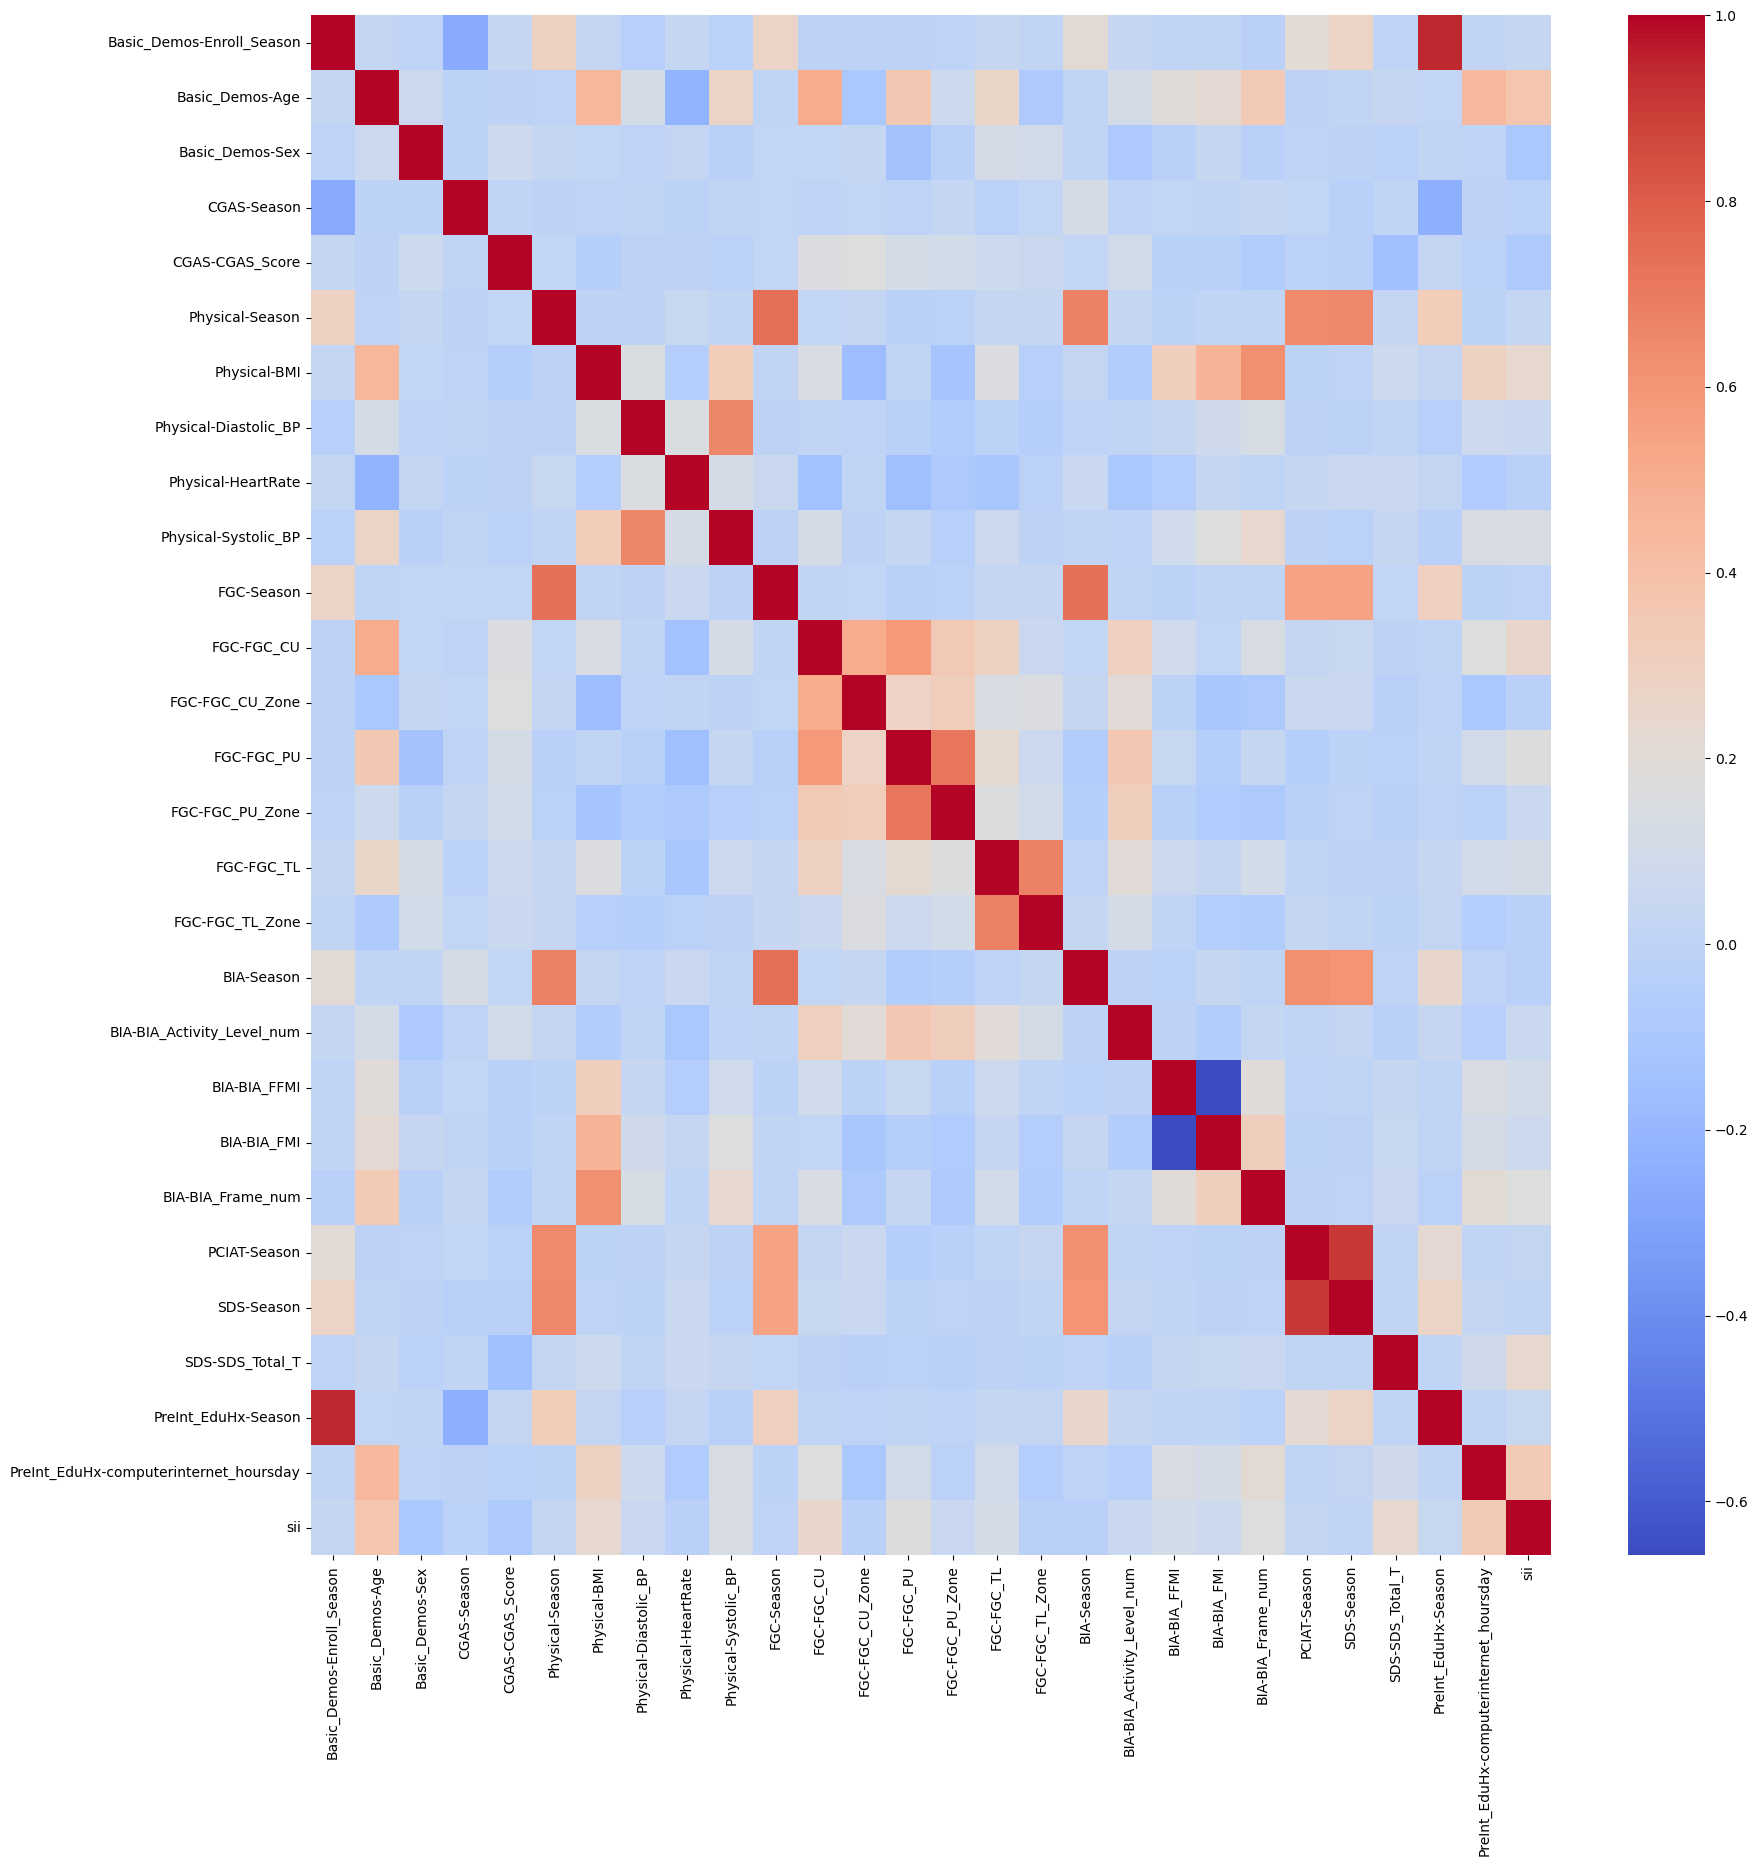

In [23]:
correlation_matrix = temp.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [24]:
# Calculate the correlation of each column with the 'sii' column
correlation_with_sii = temp.corr()['sii']

# Get the columns that have a correlation of less than 0 with 'sii'
columns_to_drop = correlation_with_sii[correlation_with_sii < 0].index

# Drop the columns from the dataframe
temp.drop(columns=columns_to_drop, inplace=True)

# Display the remaining columns
temp.columns

Index(['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Physical-Season',
       'Physical-BMI', 'Physical-Diastolic_BP', 'Physical-Systolic_BP',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_TL', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_FFMI',
       'BIA-BIA_FMI', 'BIA-BIA_Frame_num', 'PCIAT-Season', 'SDS-Season',
       'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday', 'sii'],
      dtype='object')

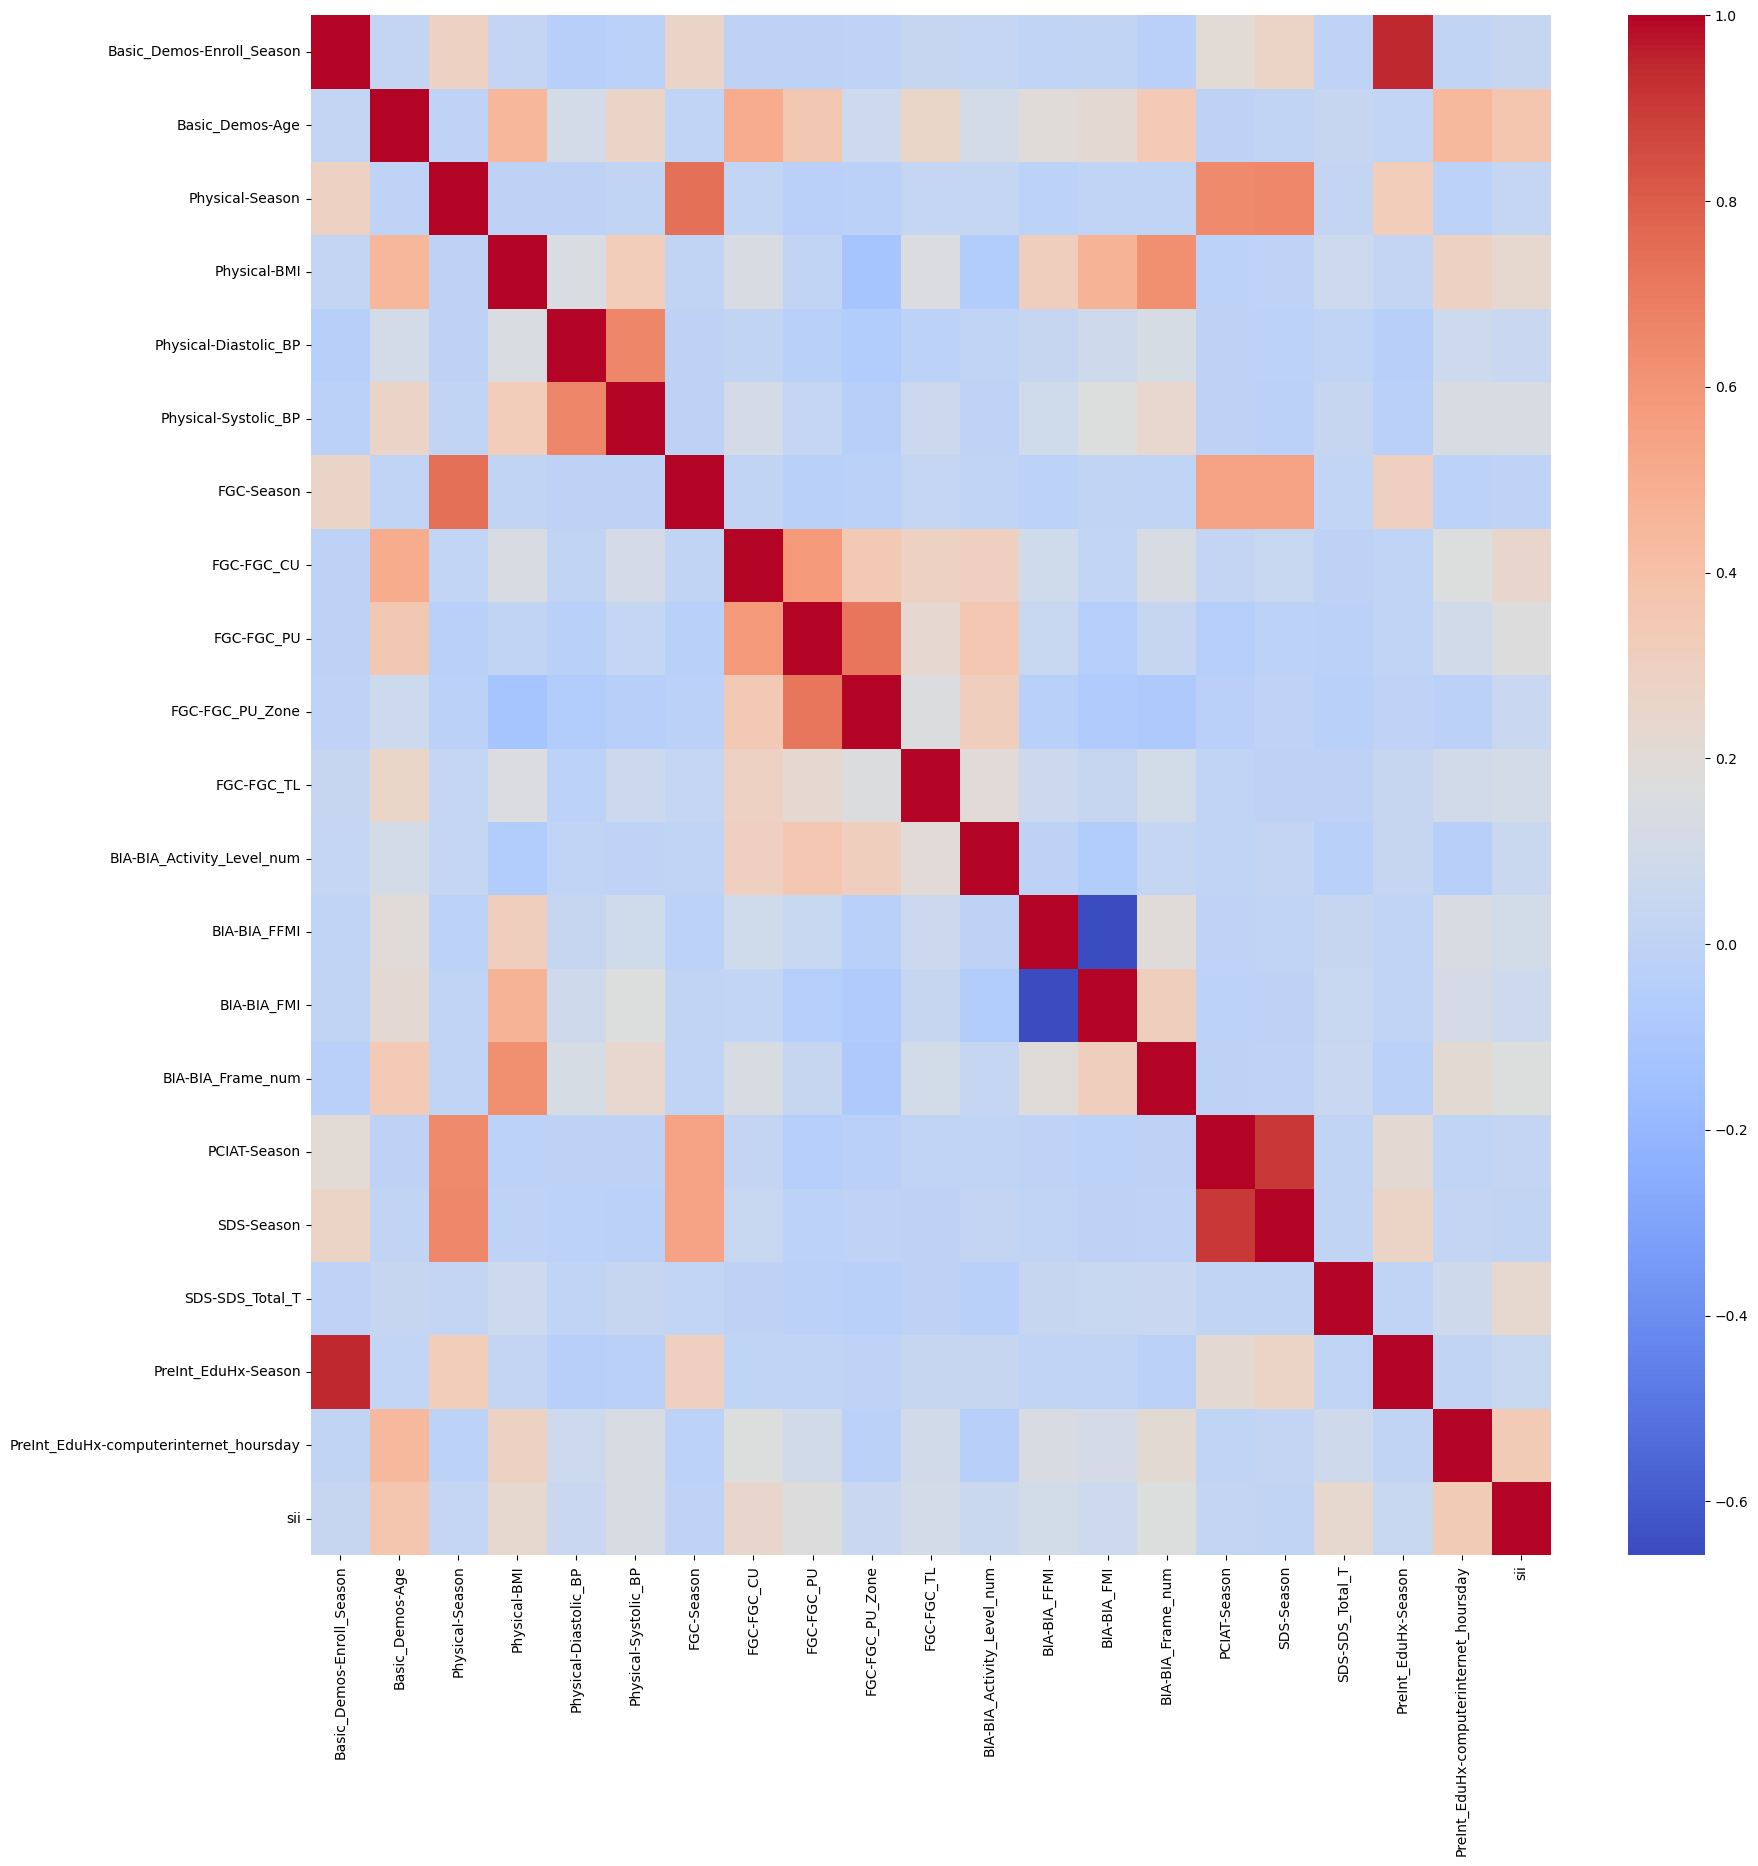

In [25]:
correlation_matrix = temp.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [26]:
train_df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
       'BIA-BIA_Frame_num', 'PCIAT-Season', 'SDS-Season', 'SDS-SDS_Total_Raw',
       'SDS-SDS_Total_T', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday', 'sii'],
      dtype='object')

In [27]:
basic_demos_df = train_df.filter(regex='^Basic_Demos')
cgas_df = train_df.filter(regex='^CGAS')
physical_df = train_df.filter(regex='^Physical')
fitness_df = train_df.filter(regex='^Fitness')
fgc_df = train_df.filter(regex='^FGC')
bia_df = train_df.filter(regex='^BIA')
paq_df = train_df.filter(regex='^PAQ')
pciat_df = train_df.filter(regex='^PCIA')
sds_df = train_df.filter(regex='^SDS')
preint_df = train_df.filter(regex='^PreInt')

In [28]:
dataframes = {
    'basic_demos_df': basic_demos_df,
    'cgas_df': cgas_df,
    'physical_df': physical_df,
    'fitness_df': fitness_df,
    'fgc_df': fgc_df,
    'bia_df': bia_df,
    'paq_df': paq_df,
    'pciat_df': pciat_df,
    'sds_df': sds_df,
    'preint_df': preint_df
}

null_percentages = {name: (df.isnull().sum() / len(df) * 100) for name, df in dataframes.items()}
for name, null_percentage in null_percentages.items():
    print(f"Null percentages for {name}:")
    display(null_percentage)

Null percentages for basic_demos_df:


Basic_Demos-Enroll_Season    0.0
Basic_Demos-Age              0.0
Basic_Demos-Sex              0.0
dtype: float64

Null percentages for cgas_df:


CGAS-Season        35.479798
CGAS-CGAS_Score    38.863636
dtype: float64

Null percentages for physical_df:


Physical-Season          16.414141
Physical-BMI              0.000000
Physical-Diastolic_BP    25.404040
Physical-HeartRate       25.075758
Physical-Systolic_BP     25.404040
dtype: float64

Null percentages for fitness_df:


Series([], dtype: float64)

Null percentages for fgc_df:


FGC-Season          15.505051
FGC-FGC_CU          41.363636
FGC-FGC_CU_Zone     42.373737
FGC-FGC_PU          41.666667
FGC-FGC_PU_Zone     42.651515
FGC-FGC_SRL         41.792929
FGC-FGC_SRL_Zone    42.752525
FGC-FGC_SRR         41.742424
FGC-FGC_SRR_Zone    42.702020
FGC-FGC_TL          41.313131
FGC-FGC_TL_Zone     42.297980
dtype: float64

Null percentages for bia_df:


BIA-Season                    45.833333
BIA-BIA_Activity_Level_num    49.722222
BIA-BIA_FFMI                  49.722222
BIA-BIA_FMI                   49.722222
BIA-BIA_Frame_num             49.722222
dtype: float64

Null percentages for paq_df:


Series([], dtype: float64)

Null percentages for pciat_df:


PCIAT-Season    30.909091
dtype: float64

Null percentages for sds_df:


SDS-Season           33.888889
SDS-SDS_Total_Raw    34.116162
SDS-SDS_Total_T      34.191919
dtype: float64

Null percentages for preint_df:


PreInt_EduHx-Season                       10.606061
PreInt_EduHx-computerinternet_hoursday    16.641414
dtype: float64

We will look more into the data if there are some patterns that we can see and to possibly use to fill values

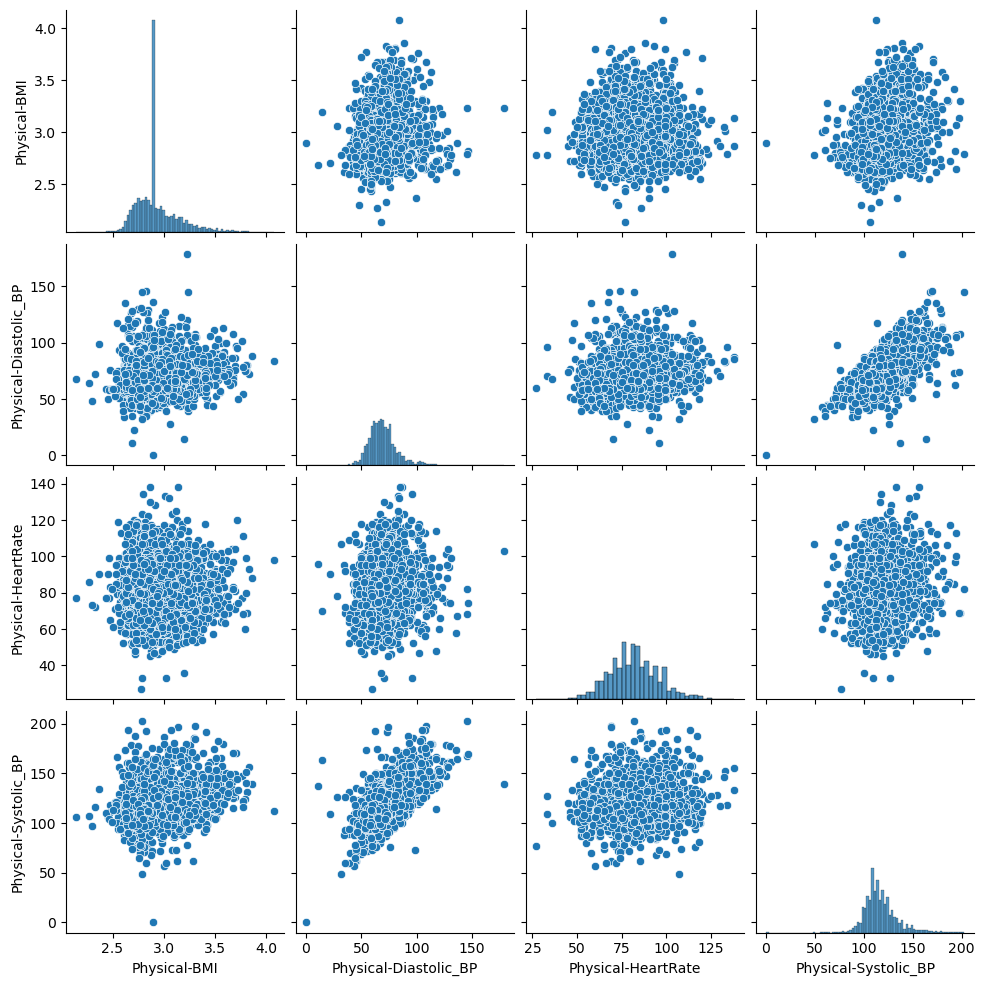

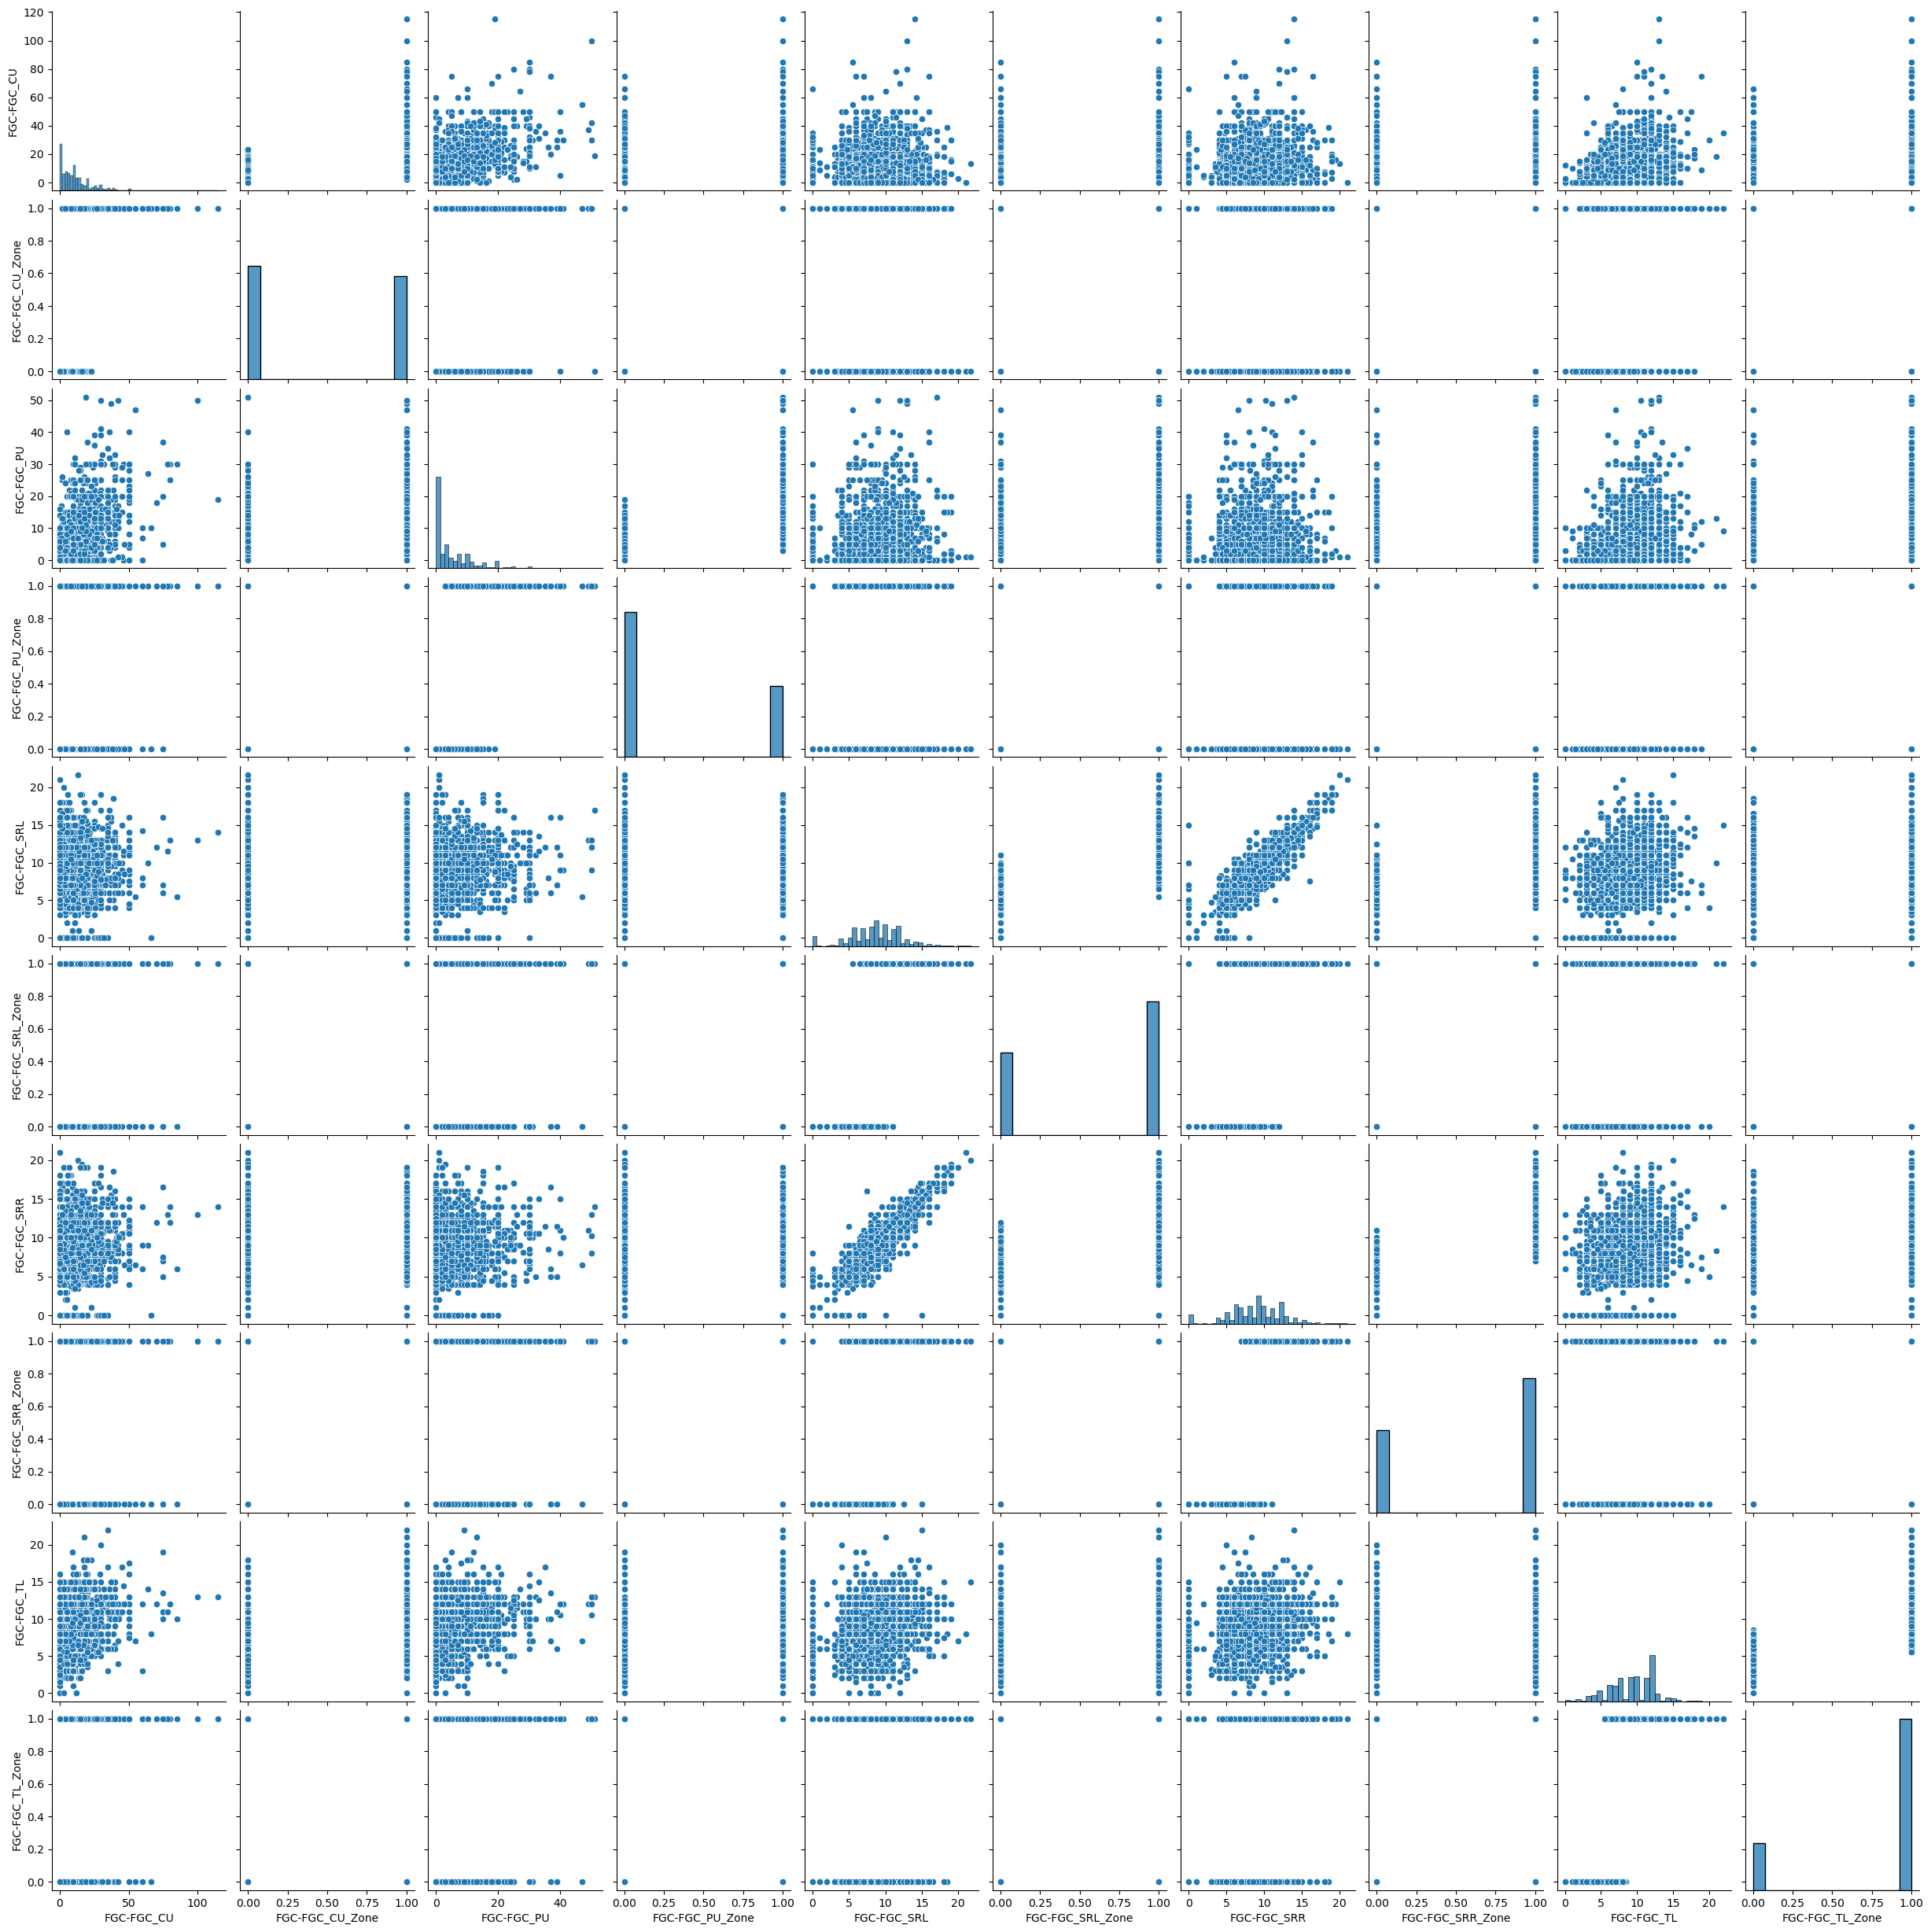

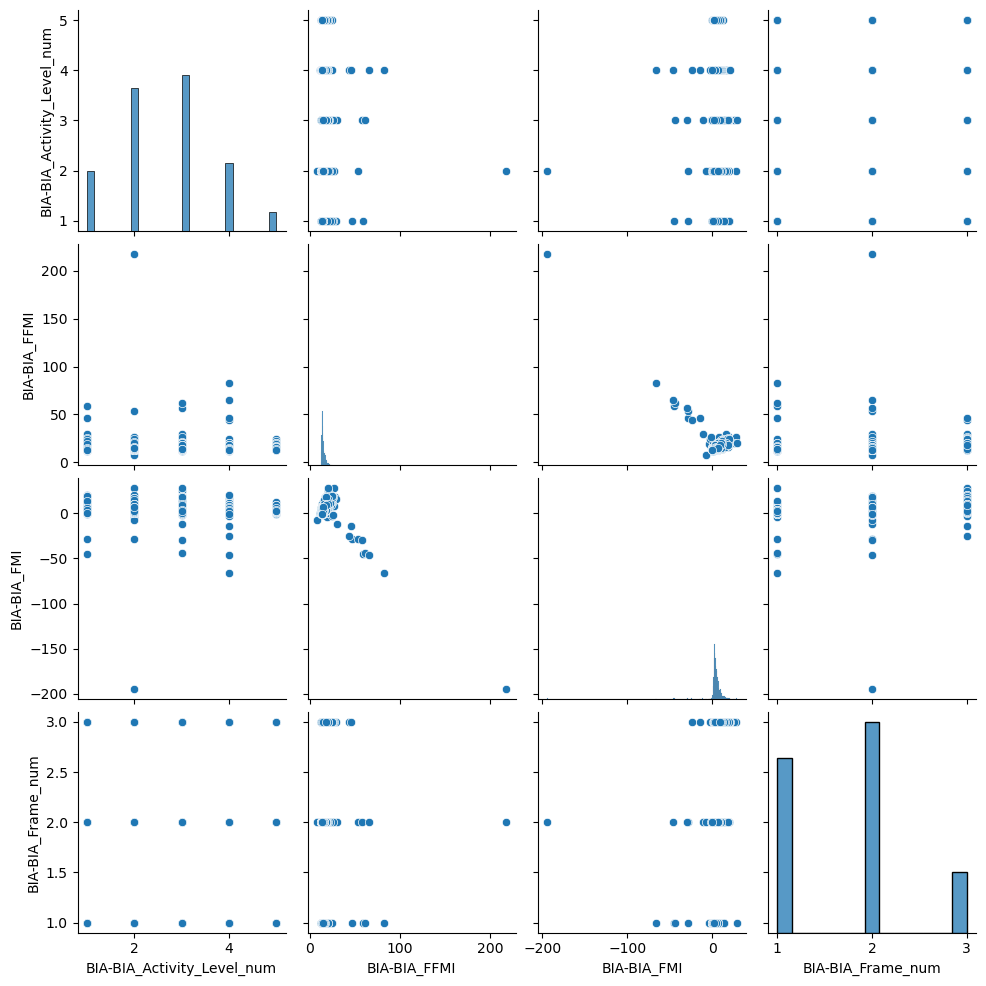

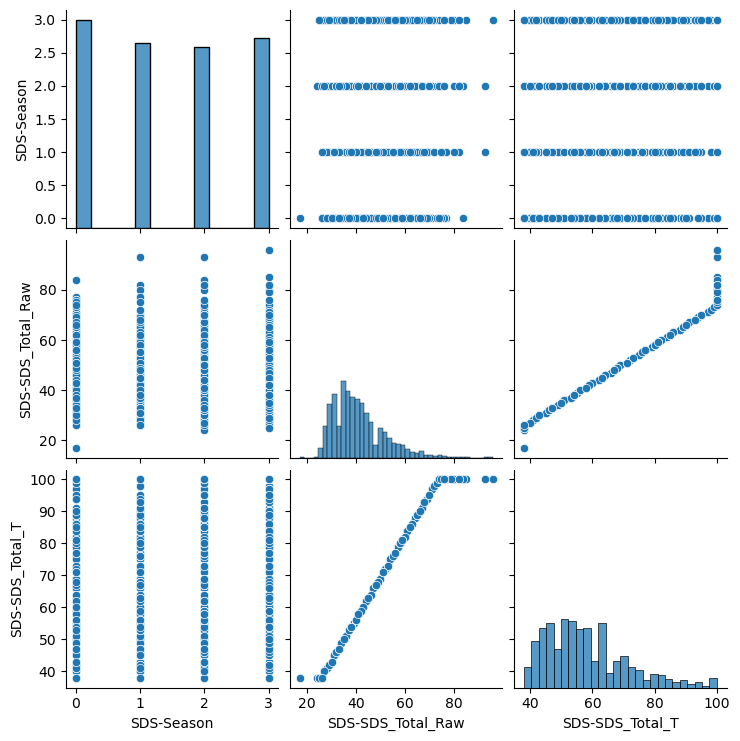

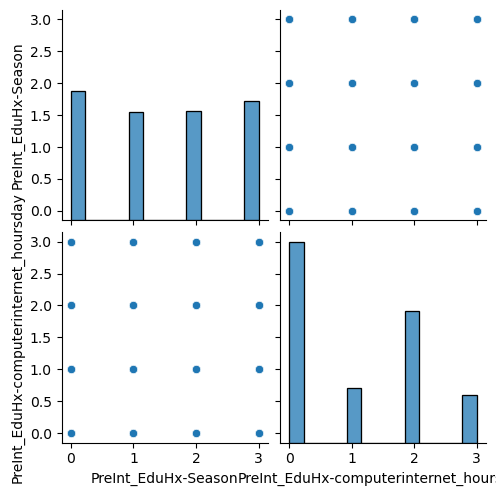

In [30]:
sns.pairplot(physical_df.drop(columns=['Physical-Season']))
plt.show()
sns.pairplot(fgc_df.drop(columns=['FGC-Season']))
plt.show()
sns.pairplot(bia_df.drop(columns=['BIA-Season']))
plt.show()
sns.pairplot(sds_df)
plt.show()
sns.pairplot(preint_df)
plt.show()

### Height is not used but this can be used as a template

In [ ]:
get_null_percentage('Physical-Height', train_df)

'Null percentage for Physical-Height: 23.56'

In [ ]:
train_df_copy = train_df.copy()
train_df_copy = train_df_copy.dropna(subset=['Physical-Height'])

poly = PolynomialFeatures(degree=3, include_bias=False)
height_model = make_pipeline(poly, LinearRegression())

X = train_df_copy[['Basic_Demos-Age']]
y = train_df_copy['Physical-Height']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

height_model.fit(X_train, y_train)

score = height_model.score(X_test, y_test)
print(f'Score: {score}')

Score: 0.8291284390356732


In [ ]:
for index, row in train_df.iterrows():
    if pd.isnull(row['Physical-Height']):
        predicted_height = height_model.predict([[row['Basic_Demos-Age']]])[0]
        train_df.at[index, 'Physical-Height'] = predicted_height

display(train_df)

/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/asilins/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/asilins/anaconda3/

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,2,5,0,3.0,51.0,2.0,16.877316,46.000000,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,2.0,3.0,2.0
1,000fd460,1,9,0,NaN,NaN,2.0,14.035590,48.000000,46.0,...,0.0,0.0,0.0,0.0,2.0,46.0,64.0,1.0,0.0,0.0
2,00105258,1,10,1,2.0,71.0,2.0,16.648696,56.500000,75.6,...,2.0,1.0,1.0,28.0,2.0,38.0,54.0,1.0,2.0,0.0
3,00115b9f,3,9,0,2.0,71.0,1.0,18.292347,56.000000,81.6,...,3.0,4.0,1.0,44.0,1.0,31.0,45.0,3.0,0.0,1.0
4,0016bb22,0,18,1,1.0,NaN,NaN,NaN,67.782975,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,2,13,0,0.0,60.0,2.0,16.362460,59.500000,82.4,...,1.0,1.0,0.0,32.0,3.0,35.0,50.0,2.0,1.0,1.0
3956,ffa9794a,3,10,0,NaN,NaN,0.0,18.764678,53.500000,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN
3957,ffcd4dbd,2,11,0,0.0,68.0,3.0,21.441500,60.000000,109.8,...,1.0,0.0,1.0,31.0,3.0,56.0,77.0,2.0,0.0,1.0
3958,ffed1dd5,0,13,0,0.0,70.0,3.0,12.235895,70.700000,87.0,...,1.0,1.0,1.0,19.0,0.0,33.0,47.0,0.0,1.0,0.0


Seeing that the result of adding the values does not give accurate results using a model to predict the values won't be useful. What also plays in the accuracy is that the plot looks more as a cone shaped.

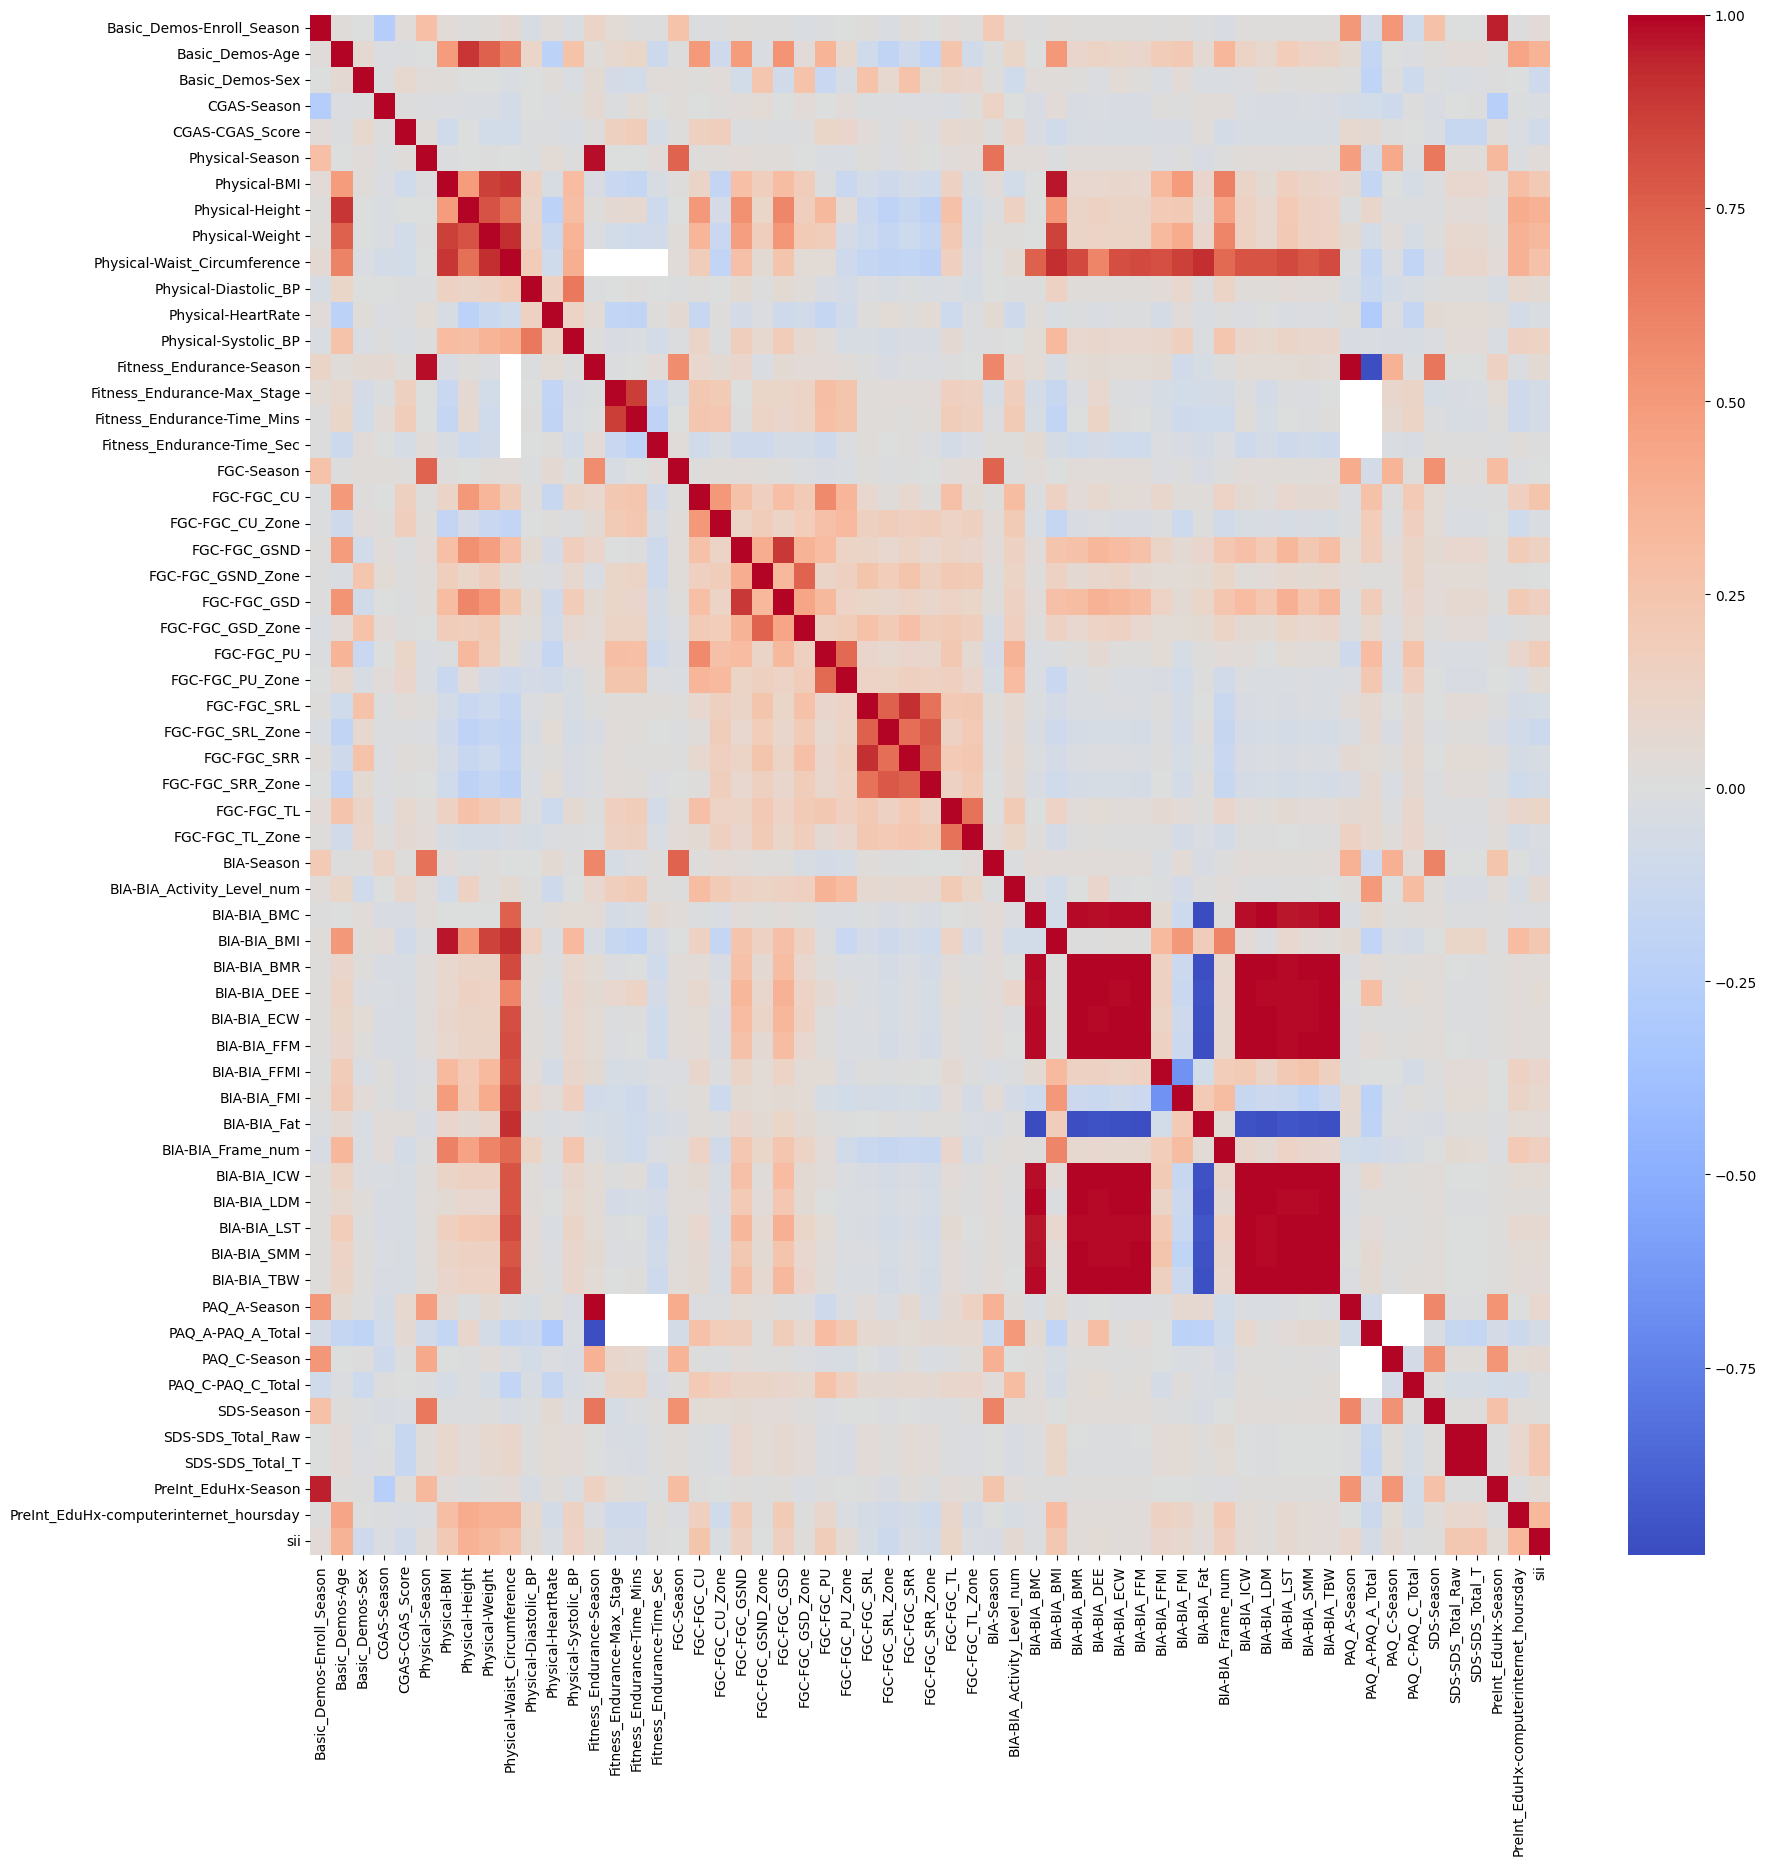

In [ ]:
temp = train_df.copy()
temp.drop(['id'], axis=1, inplace=True)
correlation_matrix = temp.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()